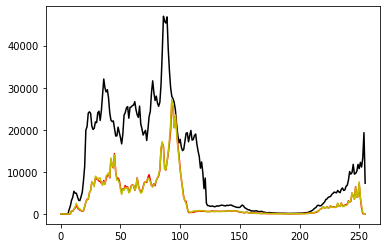

In [3]:
# grayscale conversion effects of filtering images
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0
#import image and copy in grayscale
image=cv2.cvtColor(cv2.imread('body/box2.jpg'),cv2.COLOR_BGR2RGB)
if debug:
    plt.imshow(image)
    plt.show()
imagegray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
if debug:
    plt.imshow(imagegray,cmap='gray')
    plt.show()
# bilateral filter on original and copy
fltparam=(21,51,51)
image=cv2.bilateralFilter(image,fltparam[0],fltparam[1],fltparam[2])
if debug:
    plt.imshow(image)
    plt.show()
imagegray=cv2.bilateralFilter(imagegray,fltparam[0],fltparam[1],fltparam[2])
if debug:
    plt.imshow(imagegray,cmap='gray')
    plt.show()
#reconversion of gray/conversion of colored filtered
#new=cv2.cvtColor(imagegray,cv.COLOR_GRAY2RGB) #CAN'T GO BACK since channels were merged
#if debug:
#    plt.imshow(new)
#    plt.show()
newgray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
if debug:
    plt.imshow(newgray,cmap='gray')
    plt.show()
#histogram comparison
histng,_ = np.histogram(newgray,256,[0,256])
histg,_ = np.histogram(imagegray,256,[0,256])
hist,_ = np.histogram(image,256,[0,256])
plt.plot(hist,color = 'k')
plt.plot(histg,color = 'r')
plt.plot(histng,color = 'y')
plt.show()

there's a slight difference, more noticiable if the kernel of the filter gets smaller and the action gets bigger
it's also visible how the grayscale conversin modifies the histogram

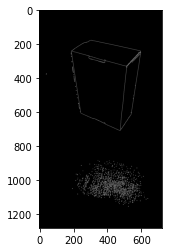

In [35]:
# channels extraction
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0
debhist=0
debhsv=0
debresult=0
debcanny=1
image=cv2.cvtColor(cv2.imread('body/box3.jpg'),cv2.COLOR_BGR2RGB)
if debug:
    plt.imshow(image)
    plt.show()
#channel split
imager,imageg,imageb = cv2.split(image)
if debug: 
    plt.imshow(imager,cmap='gray')
    plt.show()
    plt.imshow(imageg,cmap='gray')
    plt.show()
    plt.imshow(imageb,cmap='gray')
    plt.show()
#channel histograms
histr,_ = np.histogram(imager,256,[0,256])#may use imager.flatten()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
if debhist:
    plt.plot(histr,color = 'r')
    plt.plot(histg,color = 'g')
    plt.plot(histb,color = 'b')
    plt.show()
#mask of different channels

# HSV equivalent of RGB color
#green = np.uint8([[[0,255,0 ]]])
#hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
redlow=(0)
redhigh=(135)
redmask= cv2.bitwise_not(cv2.inRange(imager,redlow,redhigh))#killmaskt
rimage=cv2.bitwise_and(imager,imager,mask=redmask)
greenlow=(0)
greenhigh=(115)
greenmask= cv2.bitwise_not(cv2.inRange(imageg,greenlow,greenhigh))
gimage=cv2.bitwise_and(imageg,imageg,mask=greenmask)
bluelow=(0)
bluehigh=(115)
bluemask= cv2.bitwise_not(cv2.inRange(imageb,bluelow,bluehigh))
bimage=cv2.bitwise_and(imageb,imageb,mask=bluemask)
#channel merging
imagem=cv2.merge((rimage,gimage,bimage))
if debresult:
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY),cmap='gray')
    plt.show()
# result using colors for mask in hsv space
if debhsv:
    redlow=cv2.cvtColor(np.uint8([[[0,0,0 ]]]),cv2.COLOR_BGR2HSV)
    redhigh=cv2.cvtColor(np.uint8([[[0,135,0 ]]]),cv2.COLOR_BGR2HSV)
    redmask= cv2.bitwise_not(cv2.inRange(imager,redlow,redhigh))#killmaskt
    rimage=cv2.bitwise_and(imager,imager,mask=redmask)
    greenlow=cv2.cvtColor(np.uint8([[[0,0,0 ]]]),cv2.COLOR_BGR2HSV)
    greenhigh=cv2.cvtColor(np.uint8([[[0,115,0 ]]]),cv2.COLOR_BGR2HSV)
    greenmask= cv2.bitwise_not(cv2.inRange(imageg,greenlow,greenhigh))
    gimage=cv2.bitwise_and(imageg,imageg,mask=greenmask)
    bluelow=cv2.cvtColor(np.uint8([[[0,0,0 ]]]),cv2.COLOR_BGR2HSV)
    bluehigh=cv2.cvtColor(np.uint8([[[0,115,0 ]]]),cv2.COLOR_BGR2HSV)
    bluemask= cv2.bitwise_not(cv2.inRange(imageb,bluelow,bluehigh))
    bimage=cv2.bitwise_and(imageb,imageb,mask=bluemask)
    imagem=cv2.merge((rimage,gimage,bimage))
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY),cmap='gray')
    plt.show()
##color thresholding its still possible also in HSV space, but the range should be changed

#mask on the original image without channel separation
wholelow=(0,0,0)
wholehigh=(135,115,115)
wholemask= cv2.bitwise_not(cv2.inRange(image,wholelow,wholehigh))#killmaskt
wholeimage=cv2.bitwise_and(image,image,mask=wholemask)
if debresult:
    plt.imshow(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),cmap='gray')
    plt.show()
## the result it's clearly equal to the one on separated channels
#edges/contours on the masked image
filterparam=(100,20,0)
imagedges=cv2.Canny(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),filterparam[0], filterparam[1], filterparam[2])
if debcanny:
    plt.imshow(imagedges,cmap='gray')
    plt.show()
# opening/closing for removing noise


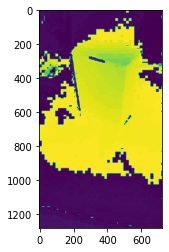

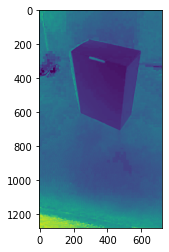

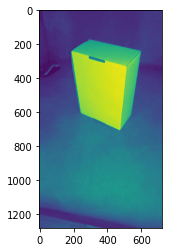

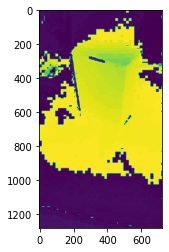

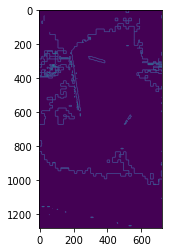

In [45]:
#using hue channel for color based edge detection
#: https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=1

image=cv2.cvtColor(cv2.imread('body/box3.jpg'),cv2.COLOR_BGR2HSV)
imgh,imgs,imgv=cv2.split(image)
if debug:
    plt.imshow(imgh)
    plt.show()
    plt.imshow(imgs)
    plt.show()
    plt.imshow(imgv)
    plt.show()
#since hue channel is circular, lowest and highest values coincide, let's shift it
#:https://stackoverflow.com/questions/49697363/shifting-hsv-pixel-values-in-python-using-numpy
#hue€[0-179], so for moving it of teta degrees, shift=theta/2
hueshift=0/2
#imgh=(imgh+ hueshift) % 180 ##iff values: <O | >360°(180)
if debug:
    plt.imshow(imgh)
    plt.show()

#channel thresholding... apparently not usefull without shifting

#edge detector
## h channel not usefull without shifting others
imghedg= cv2.Canny(imgh, 10,500,1)
if debug:
    plt.imshow(imghedg)
    plt.show()
if 0:
    limlow=(50,50,50)
    limhigh=(255,255,)
    mask = cv2.inRange(hsvimage, limlow,limhigh)
    thresimage = cv2.bitwise_and(image,image, mask=mask)
  

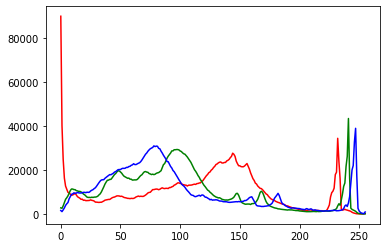

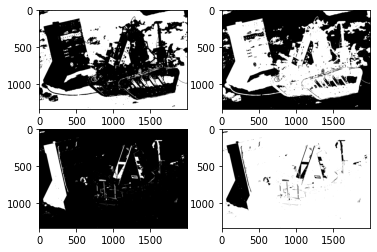

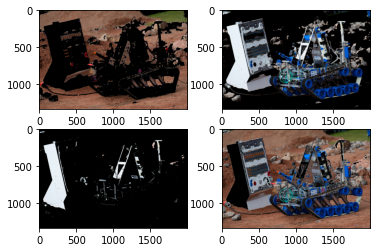

In [38]:
#COLOR SEGMENTATION ON A IMAGE FROM THE MARSYARD+PANEL(OLD)
#https://realpython.com/python-opencv-color-spaces/
#https://stackoverflow.com/questions/7722519/fast-rgb-thresholding-in-python-possibly-some-smart-opencv-code
#https://stackoverflow.com/questions/16882928/color-thresholding-on-an-opencv-video
#thresholding in general: https://stackoverflow.com/questions/60110313/opencv-thresholding-adaptive-to-different-lightning-conditions
#splitting: https://subscription.packtpub.com/book/data/9781789344912/7/ch07lvl1sec81/thresholding-color-images
#

import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.cvtColor(cv2.imread("body/task-example.jpg"), cv2.COLOR_BGR2RGB)
imager=image[:,:,0]
imageg=image[:,:,1]
imageb=image[:,:,2]

if 0: #prints all 3 channels
    plt.imshow(imager)
    plt.show()
    plt.imshow(imageg)
    plt.show()
    plt.imshow(imageb)
    plt.show()

histr,_ = np.histogram(imager,256,[0,256])#may use imager.flatten()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
plt.plot(histr,color = 'r')
plt.plot(histg,color = 'g')
plt.plot(histb,color = 'b')
plt.show()
minred=(50,50,50)
maxred=(255,255,255)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

imagehsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

masknored = cv2.bitwise_not(cv2.inRange(imagehsv, minred,maxred))
maskred = (cv2.inRange(imagehsv, minred,maxred))
imagenored = cv2.bitwise_and(image,image, mask=masknored)
imagered= cv2.bitwise_and(image,image, mask=maskred)
maskwhite = cv2.inRange(imagehsv, light_white, dark_white)
imagewhite = cv2.bitwise_and(image, image, mask=maskwhite)
masknowhite =  cv2.bitwise_not(cv2.inRange(imagehsv, light_white, dark_white))
imagenowhite =cv2.bitwise_and(image, image, mask=masknowhite)

#maskfin= maskred + maskwhite
#imagefin = cv2.bitwise_and(image,image, mask=maskfin)
plt.subplot(2, 2, 1)
plt.imshow(maskred, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(masknored, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(maskwhite, cmap="gray")
plt.subplot(2, 2, 4)
plt.imshow(masknowhite, cmap="gray")
plt.show()

plt.subplot(2, 2, 1)
plt.imshow(imagered)
plt.subplot(2, 2, 2)
plt.imshow(imagenored)
plt.subplot(2, 2, 3)
plt.imshow(imagewhite)
plt.subplot(2, 2, 4)
plt.imshow(imagenowhite)
plt.show()


In [ ]:
#https://stackoverflow.com/questions/61168140/opencv-removing-the-background-with-a-mask-image
##trasparent channel after the masking

In [39]:
#ADAPTIVE COLOR MASK
#:https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv/48367205#48367205
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0

image=cv2.cvtColor(cv2.imread('body/box3.jpg'),cv2.COLOR_BGR2RGB)

if debug:
    plt.imshow(image)
    plt.show()

#channel split
imager,imageg,imageb = cv2.split(image)

if debug: 
    plt.imshow(imager,cmap='gray')
    plt.show()
    plt.imshow(imageg,cmap='gray')
    plt.show()
    plt.imshow(imageb,cmap='gray')
    plt.show()

#channel histograms
histr,_ = np.histogram(imager,256,[0,256])#may use imager.flatte()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
if debug:
    plt.plot(histr,color = 'r')
    plt.plot(histg,color = 'g')
    plt.plot(histb,color = 'b')
    plt.show()

#channel merging
#image=cv2.merge((r,g,b)) or (b,g,r)

In [ ]:
def mythreshold(img2thr,thrmethod, thrparam):
    
     #adaptive param??
    
    if thrmethod=='canny':
        #requires 3 param , eg: thrparam=(120,255,0)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg = cv2.Canny(img2thr_grey, thrparam[0], thrparam[1], thrparam[2])
    elif thrmethod=='simple':
        #requires 2 param , eg: thrparam=(127,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],cv2.THRESH_BINARY)
        #also cv2.THRESH_BINARY_INV , cv2.THRESH_TRUNC , cv2.THRESH_TOZERO , cv2.THRESH_TOZERO_INV
    elif thrmethod=='otsu':
        #requires 2 param , eg: thrparam=(0,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],
                                           cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    elif thrmethod=='adaptive':
        # requires 3 param , eg: thrparam=(255,11,2)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg=cv2.adaptiveThreshold(img2thr_grey,thrparam[0], cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY,thrparam[1], thrparam[2])
        #also cv2.ADAPTIVE_THRESH_GAUSSIAN_C , same parameters
    elif thrmethod=='killcolor':
        #requires 2 param (vectorial) , eg: thrcol_low=(50,50,50) , thrcol_high=(255,255,255)
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5]) #color window
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV) #hsv 
        thrmask = cv2.bitwise_not(cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high))
        thrdimg = thrmask# for the mask #cv2.bitwise_and(img2thr,img2thr, mask=thrmask) #for the masked image
    elif thrmethod=='letcolor':
        #requires 2 param (vectorial) ,
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5])
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV)
        thrmask = cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high)
        thrdimg = thrmask#cv2.bitwise_and(img2thr,img2thr, mask=thrmask)
    #else: print('not binarized!')
    return thrdimg

## switch, elif, dictionaris: which one to use?
#https://www.pydanny.com/why-doesnt-python-have-switch-case.html
#https://stackoverflow.com/questions/60208/replacements-for-switch-statement-in-python
## more efficient way to pass many parameters
#
def myfilter(fltgimg,fltmeth,fltparam):
    
    #adaptive kernel ??
    
    if fltmeth=='gaussian':
        #3param eg: fltparam=(21,21,0)
        filtdimg=cv2.GaussianBlur(fltgimg, (fltparam[0],fltparam[1]),fltparam[2])
    elif fltmeth=='bilateral':
        #3param eg: fltparam=(21,51,51)
        filtdimg=cv2.bilateralFilter(fltgimg,fltparam[0],fltparam[1],fltparam[2])
    #elif fltmeth=='mean':
        #
    elif fltmeth=='median':
        #1param eg: fltparam=(21)
        filtdimg=cv2.medianBlur(img, fltparam[0])
    #else: print('not filtered')
    return filtdimg

#https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html
#https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

def mymorph(mrpimg,mrpmeth,mrpparam):
# requires 4 param ie: mrpparam=(kern_sizex,kern_sizey,numbiter_erode, numbiter_dilate)    
    #adaptive kernel??
    
    
    #if mrpmeth!=0:
        #if mrphparam[0]!=0
    mrpkernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( mrpparam[0], mrpparam[1] ) )
        #else: morphkernel=cv2.getStructuringElement( cv2.MORPH_RECT, (7,7))
    if mrpmeth=='close':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_CLOSE, mrpkernel )
    elif mrpmeth=='open':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_OPEN, mrpkernel )    
    elif mrpmeth=='erode':
        mrpdimg = cv2.erode(mrpdimg,mrpkernel,iterations = mrpparam[2])
    elif mrpmeth=='dilate':
        mrpdimg = cv2.dilate(mrpdimg,mrpkernel,iterations = mrpparam[3])
    #else: print('not morphed')
        
    return mrpdimg